## **Project Title** 
### "Analyzing and Visualizing British Columbia's Electrical Energy Trade to Support Data-Driven Decisions"

### Created by: Olanrewaju Olajuyi

In [3]:
########################################################################################################################################################

### 1. Define Project Objectives
##### •	Understand trends in electricity trade (monthly and annual).
##### •	Identify key drivers of trade imbalances (e.g., seasonal, regional, or policy-driven).
##### •	Build an interactive dashboard to display findings for business decision-making.


In [5]:
########################################################################################################################################################

### 2. Data Preparation

##### Load the dataset and uploading neccessary libraries..

In [9]:
import pandas as pd

# Define the URL for the dataset
dataset_url = "https://catalogue.data.gov.bc.ca/dataset/ca3ad618-b023-4f22-b3f2-e9de1bee92d3/resource/7ea502cd-d9a6-4e46-b903-1a3530cbcc8f/download/exp_electricity_trade.xlsx"

# Load the dataset
monthly_data = pd.read_excel(dataset_url, sheet_name='Monthly')
annual_data = pd.read_excel(dataset_url, sheet_name='Annual')

# Display the first few rows of each dataset
monthly_data_preview = monthly_data.head()
annual_data_preview = annual_data.head()

monthly_data_preview, annual_data_preview

(  British Columbia Trade in Electrical Energy - Monthly* Unnamed: 1  \
 0                         Quantity in Megawatt Hours            NaN   
 1                                                NaN            NaN   
 2                                               Year          Month   
 3                                               1998        January   
 4                                               1998       February   
 
    Unnamed: 2  Unnamed: 3        Unnamed: 4               Unnamed: 5  \
 0         NaN         NaN               NaN                      NaN   
 1         NaN         NaN               NaN                      NaN   
 2  US Exports  US Imports  US Trade Balance  Interprovincial Exports   
 3      856972      226405            630567                    42724   
 4      577122      335273            241849                    93004   
 
                 Unnamed: 6                     Unnamed: 7  \
 0                      NaN                            NaN   
 1

### Clean the Data
##### •	Remove the first 3 rows to normalize the dataset.
##### •	Rename columns for consistency (if necessary).
##### •  Handle non-numeric entries in numeric columns.
##### •	Check for and handle missing values or anomalies.
##### •	Ensure correct data types for columns (e.g., dates, numbers).


In [11]:
#######################################################################################################################################################

#### •	Removing the first 3 rows to normalize the dataset.

In [13]:
# Task 1: Remove the first 3 rows to normalize the dataset

# Reload the dataset with adjusted parameters to handle the top rows
monthly_data = pd.read_excel(dataset_url, sheet_name='Monthly', skiprows=3)
annual_data = pd.read_excel(dataset_url, sheet_name='Annual', skiprows=3)

# Display the first few rows of each cleaned dataset
monthly_data_cleaned_preview = monthly_data.head()
annual_data_cleaned_preview = annual_data.head()

monthly_data_cleaned_preview, annual_data_cleaned_preview

(   Year     Month  US Exports  US Imports  US Trade Balance  \
 0  1998   January    856972.0    226405.0          630567.0   
 1  1998  February    577122.0    335273.0          241849.0   
 2  1998     March    485555.0    257495.0          228060.0   
 3  1998     April    769008.0    295140.0          473868.0   
 4  1998       May    169586.0    582694.0         -413108.0   
 
    Interprovincial Exports Interprovincial Imports  \
 0                  42724.0                   82739   
 1                  93004.0                   68076   
 2                 191445.0                   43947   
 3                 136221.0                   48174   
 4                 193264.0                   43665   
 
   Interprovincial Trade Balance Overall Trade Balance  
 0                        -40015                590552  
 1                         24928                266777  
 2                        147498                375558  
 3                         88047                561915

#### • Rename columns for consistency.

In [15]:
# Task 2: Rename columns for consistency 

# Define new column names for monthly and annual data

monthly_columns = {
    'Year': 'Year',
    'Month': 'Month',
    'US Exports': 'US_Exports',
    'US Imports': 'US_Imports',
    'US Trade Balance': 'US_Trade_Balance',
    'Interprovincial Exports': 'Interprovincial_Exports',
    'Interprovincial Imports': 'Interprovincial_Imports',
    'Interprovincial Trade Balance': 'Interprovincial_Trade_Balance',
    'Overall Trade Balance': 'Overall_Trade_Balance'
}

annual_columns = {
    'Year': 'Year',
    'US Exports': 'US_Exports',
    'US Imports': 'US_Imports',
    'US Trade Balance': 'US_Trade_Balance',
    'Interprovincial Exports': 'Interprovincial_Exports',
    'Interprovincial Imports': 'Interprovincial_Imports',
    'Interprovincial Trade Balance': 'Interprovincial_Trade_Balance',
    'Overall Trade Balance': 'Overall_Trade_Balance'
}

# Apply the column renaming to both datasets, ensuring they are renamed properly
monthly_data.rename(columns=monthly_columns, inplace=True)
annual_data.rename(columns=annual_columns, inplace=True)

# Verify the changes
print("Updated Monthly Data Columns:")
print(monthly_data.columns)

print("\nUpdated Annual Data Columns:")
print(annual_data.columns)

Updated Monthly Data Columns:
Index(['Year', 'Month', 'US_Exports', 'US_Imports', 'US_Trade_Balance',
       'Interprovincial_Exports', 'Interprovincial_Imports',
       'Interprovincial_Trade_Balance', 'Overall_Trade_Balance'],
      dtype='object')

Updated Annual Data Columns:
Index(['Year', 'US_Exports', 'US_Imports', 'US_Trade_Balance',
       'Interprovincial_Exports', 'Interprovincial_Imports',
       'Interprovincial_Trade_Balance', 'Overall_Trade_Balance'],
      dtype='object')


In [18]:
monthly_data

,Year,Month,US_Exports,US_Imports,US_Trade_Balance,Interprovincial_Exports,Interprovincial_Imports,Interprovincial_Trade_Balance,Overall_Trade_Balance
0,1998,January,856972.0,226405.0,630567.0,42724.0,82739,-40015,590552
1,1998,February,577122.0,335273.0,241849.0,93004.0,68076,24928,266777
2,1998,March,485555.0,257495.0,228060.0,191445.0,43947,147498,375558
3,1998,April,769008.0,295140.0,473868.0,136221.0,48174,88047,561915
4,1998,May,169586.0,582694.0,-413108.0,193264.0,43665,149599,-263509
...,...,...,...,...,...,...,...,...,...
325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,""".."" denotes data not available.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### • Handle non-numeric entries in numeric columns

In [22]:
import pandas as pd

# Task 3: Handle non-numeric entries in numeric columns
# Coerce non-numeric values (such as comments or invalid data) into NaN for monthly and annual data

numeric_columns = [
    'US_Exports', 'US_Imports', 'US_Trade_Balance',
    'Interprovincial_Exports', 'Interprovincial_Imports',
    'Interprovincial_Trade_Balance', 'Overall_Trade_Balance'
]

# Coerce non-numeric values to NaN for both monthly and annual data
for col in numeric_columns:
    monthly_data[col] = pd.to_numeric(monthly_data[col], errors='coerce')  # Coerce non-numeric to NaN
    annual_data[col] = pd.to_numeric(annual_data[col], errors='coerce')  # Coerce non-numeric to NaN

# After coercion, check for NaN values and decide how to handle them (e.g., filling with 0 or dropping)
print("Monthly Data - After Handling Non-Numeric Entries:")
print(monthly_data[numeric_columns].isnull().sum())  # Check for NaNs in numeric columns

print("\nAnnual Data - After Handling Non-Numeric Entries:")
print(annual_data[numeric_columns].isnull().sum())  # Check for NaNs in numeric columns

Monthly Data - After Handling Non-Numeric Entries:
US_Exports                        8
US_Imports                        8
US_Trade_Balance                  8
Interprovincial_Exports           8
Interprovincial_Imports          13
Interprovincial_Trade_Balance    13
Overall_Trade_Balance            13
dtype: int64

Annual Data - After Handling Non-Numeric Entries:
US_Exports                        7
US_Imports                        7
US_Trade_Balance                  7
Interprovincial_Exports          10
Interprovincial_Imports          10
Interprovincial_Trade_Balance    10
Overall_Trade_Balance            10
dtype: int64


#### • Check missing values and remove NaN

In [26]:
import pandas as pd
import re

# Task 4: Clean monthly and annual data to remove NaN and missing values

# Sample comment strings to be removed
comment_strings = [
    "* Due to discrepancies in international trade data in electrical energy",
    "quantities are only reported for trade with the United States",
    '".." denotes data not available',
    "Adapted from Statistics Canada",
    "This does not constitute an endorsement by Statistics Canada of this product."
]

# Create a regular expression pattern to match these comments
comment_patterns = [re.escape(comment) for comment in comment_strings]

# Remove rows containing these comment patterns in any column of the monthly and annual data
for pattern in comment_patterns:
    monthly_data = monthly_data[~monthly_data.apply(lambda row: row.astype(str).str.contains(pattern, na=False).any(), axis=1)]
    annual_data = annual_data[~annual_data.apply(lambda row: row.astype(str).str.contains(pattern, na=False).any(), axis=1)]

# Coerce non-numeric values in numeric columns to NaN
numeric_columns = [
    'US_Exports', 'US_Imports', 'US_Trade_Balance',
    'Interprovincial_Exports', 'Interprovincial_Imports',
    'Interprovincial_Trade_Balance', 'Overall_Trade_Balance'
]

for col in numeric_columns:
    monthly_data[col] = pd.to_numeric(monthly_data[col], errors='coerce')  # Coerce non-numeric to NaN
    annual_data[col] = pd.to_numeric(annual_data[col], errors='coerce')  # Coerce non-numeric to NaN

# Drop rows where 'Year' or 'Month' has NaN values in monthly data
monthly_data.dropna(subset=['Year', 'Month'], inplace=True)

# Drop rows where 'Year' has NaN values in annual data
annual_data.dropna(subset=['Year'], inplace=True)

# Fill missing values in numeric columns with 0 for monthly data
for col in numeric_columns:
    monthly_data[col] = monthly_data[col].fillna(0)

# Fill missing values in numeric columns with 0 for annual data
for col in numeric_columns:
    if isinstance(annual_data[col].dtype, pd.CategoricalDtype):
        # Add 0 to the categories if not already present
        if 0 not in annual_data[col].cat.categories:
            annual_data[col] = annual_data[col].cat.add_categories([0])
    # Fill NaN values with 0
    annual_data[col] = annual_data[col].fillna(0)

# Recalculate Overall_Trade_Balance for both datasets
monthly_data['Overall_Trade_Balance'] = (
    (monthly_data['US_Exports'] + monthly_data['Interprovincial_Exports']) -
    (monthly_data['US_Imports'] + monthly_data['Interprovincial_Imports'])
)

annual_data['Overall_Trade_Balance'] = (
    (annual_data['US_Exports'] + annual_data['Interprovincial_Exports']) -
    (annual_data['US_Imports'] + annual_data['Interprovincial_Imports'])
)

# Check for missing or '0' values in the 'Year' and 'Month' columns
print("\nMonthly Data - NaN values in 'Year' column:", monthly_data['Year'].isnull().sum())
print("Monthly Data - NaN values in 'Month' column:", monthly_data['Month'].isnull().sum())
print("Monthly Data - '0' values in 'Year' column:", (monthly_data['Year'] == 0).sum())
print("Monthly Data - '0' values in 'Month' column:", (monthly_data['Month'] == 0).sum())

# Display cleaned datasets
print("\nCleaned Monthly Data:")
print(monthly_data.head())

print("\nCleaned Annual Data:")
print(annual_data.head())

# Verify no missing or NaN values
print("\nMonthly Data - Missing and NaN Values:")
print(monthly_data.isnull().sum())

print("\nAnnual Data - Missing and NaN Values:")
print(annual_data.isnull().sum())


Monthly Data - NaN values in 'Year' column: 0
Monthly Data - NaN values in 'Month' column: 0
Monthly Data - '0' values in 'Year' column: 0
Monthly Data - '0' values in 'Month' column: 0

Cleaned Monthly Data:
   Year     Month  US_Exports  US_Imports  US_Trade_Balance  \
0  1998   January    856972.0    226405.0          630567.0   
1  1998  February    577122.0    335273.0          241849.0   
2  1998     March    485555.0    257495.0          228060.0   
3  1998     April    769008.0    295140.0          473868.0   
4  1998       May    169586.0    582694.0         -413108.0   

   Interprovincial_Exports  Interprovincial_Imports  \
0                  42724.0                  82739.0   
1                  93004.0                  68076.0   
2                 191445.0                  43947.0   
3                 136221.0                  48174.0   
4                 193264.0                  43665.0   

   Interprovincial_Trade_Balance  Overall_Trade_Balance  
0                     

In [27]:
monthly_data

,Year,Month,US_Exports,US_Imports,US_Trade_Balance,Interprovincial_Exports,Interprovincial_Imports,Interprovincial_Trade_Balance,Overall_Trade_Balance
0,1998,January,856972.0,226405.0,630567.0,42724.0,82739.0,-40015.0,590552.0
1,1998,February,577122.0,335273.0,241849.0,93004.0,68076.0,24928.0,266777.0
2,1998,March,485555.0,257495.0,228060.0,191445.0,43947.0,147498.0,375558.0
3,1998,April,769008.0,295140.0,473868.0,136221.0,48174.0,88047.0,561915.0
4,1998,May,169586.0,582694.0,-413108.0,193264.0,43665.0,149599.0,-263509.0
...,...,...,...,...,...,...,...,...,...
317,2024,June,701212.0,1184018.0,-482806.0,3442.0,163721.0,-160279.0,-643085.0
318,2024,July,1022811.0,1167381.0,-144570.0,26202.0,164707.0,-138505.0,-283075.0
319,2024,August,799809.0,1001377.0,-201568.0,3994.0,280154.0,-276160.0,-477728.0
320,2024,September,813553.0,957592.0,-144039.0,14590.0,169512.0,-154922.0,-298961.0


In [30]:
annual_data

,Year,US_Exports,US_Imports,US_Trade_Balance,Interprovincial_Exports,Interprovincial_Imports,Interprovincial_Trade_Balance,Overall_Trade_Balance
0,1998,9260787.0,4311647.0,4949140.0,1358651.0,744581.0,614070.0,5563210.0
1,1999,10922894.0,6611691.0,4311203.0,1606215.0,195151.0,1411064.0,5722267.0
2,2000,9868814.0,5244934.0,4623880.0,829341.0,794077.0,35264.0,4659144.0
3,2001,6036962.0,8024125.0,-1987163.0,370734.0,1757089.0,-1386355.0,-3373518.0
4,2002,7506150.0,5154173.0,2351977.0,571930.0,375888.0,196042.0,2548019.0
5,2003,8638586.0,5087189.0,3551397.0,960490.0,1138885.0,-178395.0,3373002.0
6,2004,5645631.0,6999817.0,-1354186.0,1145262.0,951189.0,194073.0,-1160113.0
7,2005,8258689.0,6056127.0,2202562.0,988772.0,952755.0,36017.0,2238579.0
8,2006,5104041.0,12208557.0,-7104516.0,1051391.0,393832.0,657559.0,-6446957.0
9,2007,10136684.0,7201524.0,2935160.0,849871.0,737578.0,112293.0,3047453.0


#### • Ensure correct data types for columns

In [33]:
import pandas as pd

# Task 5: Ensure correct data types but convert 'Month' to categorical (no changes to 'Month' values)
# Convert 'Year' to integer and other numeric columns to numeric type (if not already)
monthly_data['Year'] = monthly_data['Year'].astype(int)

# Define the numeric columns
numeric_columns = [
    'US_Exports', 'US_Imports', 'US_Trade_Balance',
    'Interprovincial_Exports', 'Interprovincial_Imports',
    'Interprovincial_Trade_Balance', 'Overall_Trade_Balance'
]

# Convert the specified numeric columns to numeric type in the monthly data
for col in numeric_columns:
    monthly_data[col] = pd.to_numeric(monthly_data[col], errors='coerce')

# Ensure 'Month' column remains in its original format and is converted to categorical type
monthly_data['Month'] = monthly_data['Month'].astype("category")

# Convert 'Year' and numeric columns in the annual data similarly
annual_data['Year'] = annual_data['Year'].astype(int)

for col in numeric_columns:
    annual_data[col] = pd.to_numeric(annual_data[col], errors='coerce')

# Verify the data types to ensure everything is converted correctly
print("Monthly Data Types:")
print(monthly_data.dtypes)

print("\nAnnual Data Types:")
print(annual_data.dtypes)

Monthly Data Types:
Year                                int32
Month                            category
US_Exports                        float64
US_Imports                        float64
US_Trade_Balance                  float64
Interprovincial_Exports           float64
Interprovincial_Imports           float64
Interprovincial_Trade_Balance     float64
Overall_Trade_Balance             float64
dtype: object

Annual Data Types:
Year                               int32
US_Exports                       float64
US_Imports                       float64
US_Trade_Balance                 float64
Interprovincial_Exports          float64
Interprovincial_Imports          float64
Interprovincial_Trade_Balance    float64
Overall_Trade_Balance            float64
dtype: object


In [35]:
# Check for missing (NaN) values in both monthly_data and annual_data
print("\nCheck for missing (NaN) values in Monthly Data:")
print(monthly_data.isnull().sum())

print("\nCheck for missing (NaN) values in Annual Data:")
print(annual_data.isnull().sum())

# Confirm if there are any missing values (NaN) in the dataset
monthly_missing = monthly_data.isnull().sum().sum()
annual_missing = annual_data.isnull().sum().sum()

if monthly_missing == 0:
    print("\nNo missing values in Monthly Data.")
else:
    print(f"\nThere are {monthly_missing} missing values in Monthly Data.")

if annual_missing == 0:
    print("\nNo missing values in Annual Data.")
else:
    print(f"\nThere are {annual_missing} missing values in Annual Data.")


Check for missing (NaN) values in Monthly Data:
Year                             0
Month                            0
US_Exports                       0
US_Imports                       0
US_Trade_Balance                 0
Interprovincial_Exports          0
Interprovincial_Imports          0
Interprovincial_Trade_Balance    0
Overall_Trade_Balance            0
dtype: int64

Check for missing (NaN) values in Annual Data:
Year                             0
US_Exports                       0
US_Imports                       0
US_Trade_Balance                 0
Interprovincial_Exports          0
Interprovincial_Imports          0
Interprovincial_Trade_Balance    0
Overall_Trade_Balance            0
dtype: int64

No missing values in Monthly Data.

No missing values in Annual Data.


In [37]:
########################################################################################################################################################

### Interpretation of the results: Clean the Data

#### 1. Remove the first 3 rows to normalize the dataset

The first three rows were removed to ensure that the dataset starts with relevant data, eliminating potential header or metadata information that could interfere with analysis.

#### 2. Rename columns for consistency

Renaming columns standardizes their names, ensuring uniformity across the dataset and improving readability for further analysis. This helps avoid confusion when working with multiple datasets or performing operations on column names.

#### 3. Handle non-numeric entries in numeric columns

Non-numeric entries in columns expected to be numeric were either removed or converted to NaN values, ensuring that calculations and analyses using these columns won’t result in errors.

#### 4. Check for and handle missing values or anomalies

Missing or anomalous values were identified and appropriately addressed, either by removing them or filling them with default values (e.g., 0), ensuring that the dataset remains clean and consistent for analysis.

#### 5. Ensure correct data types for columns (e.g., dates, numbers)

Data types for each column were verified and corrected to match the expected types (e.g., ensuring date columns are recognized as dates and numeric columns as numbers). This is crucial for enabling proper data operations and calculations.
Overall, these steps help standardize the dataset, ensuring it’s clean, consistent, and ready for analysis or further modeling.

### Derive New Metrics
#### •	Calculate additional fields like:
##### •	Export-to-import ratio.
##### •	Total trade (sum of exports and imports).
##### •	Trade balance trends across regions.

In [41]:
# Assuming 'monthly_data' and 'annual_data' have already been cleaned

# 1. Calculate Export-to-Import Ratio (for monthly and annual data)
monthly_data['Export_to_Import_Ratio'] = (monthly_data['US_Exports'] + monthly_data['Interprovincial_Exports']) / \
                                          (monthly_data['US_Imports'] + monthly_data['Interprovincial_Imports'])

annual_data['Export_to_Import_Ratio'] = (annual_data['US_Exports'] + annual_data['Interprovincial_Exports']) / \
                                         (annual_data['US_Imports'] + annual_data['Interprovincial_Imports'])

# Handle any potential division by zero (where imports might be 0)
monthly_data['Export_to_Import_Ratio'] = monthly_data['Export_to_Import_Ratio'].replace([float('inf'), -float('inf')], 0)
annual_data['Export_to_Import_Ratio'] = annual_data['Export_to_Import_Ratio'].replace([float('inf'), -float('inf')], 0)

# 2. Calculate Total Trade (sum of exports and imports)
monthly_data['Total_Trade'] = (monthly_data['US_Exports'] + monthly_data['Interprovincial_Exports']) + \
                               (monthly_data['US_Imports'] + monthly_data['Interprovincial_Imports'])

annual_data['Total_Trade'] = (annual_data['US_Exports'] + annual_data['Interprovincial_Exports']) + \
                              (annual_data['US_Imports'] + annual_data['Interprovincial_Imports'])

# 3. Calculate Trade Balance Trends across Regions
# Trade Balance is already calculated as Overall_Trade_Balance, but we can track trends by looking at changes in it
monthly_data['Trade_Balance_Trend'] = monthly_data['Overall_Trade_Balance'].diff().fillna(0)
annual_data['Trade_Balance_Trend'] = annual_data['Overall_Trade_Balance'].diff().fillna(0)

# Display the new metrics in both datasets
print("\nMonthly Data with New Metrics:")
print(monthly_data[['Year', 'Month', 'Export_to_Import_Ratio', 'Total_Trade', 'Trade_Balance_Trend']].head())

print("\nAnnual Data with New Metrics:")
print(annual_data[['Year', 'Export_to_Import_Ratio', 'Total_Trade', 'Trade_Balance_Trend']].head())


Monthly Data with New Metrics:
   Year     Month  Export_to_Import_Ratio  Total_Trade  Trade_Balance_Trend
0  1998   January                2.910281    1208840.0                  0.0
1  1998  February                1.661405    1073475.0            -323775.0
2  1998     March                2.245872     978442.0             108781.0
3  1998     April                2.636738    1248543.0             186357.0
4  1998       May                0.579300     989209.0            -825424.0

Annual Data with New Metrics:
   Year  Export_to_Import_Ratio  Total_Trade  Trade_Balance_Trend
0  1998                2.100269   15675666.0                  0.0
1  1999                1.840664   19335951.0             159057.0
2  2000                1.771508   16737166.0           -1063123.0
3  2001                0.655102   16188910.0           -8032662.0
4  2002                1.460758   13608141.0            5921537.0


In [43]:
########################################################################################################################################################

### Interpretation of Key Metrics:
#### Export-to-Import Ratio:

A ratio >1 indicates a trade surplus (exports > imports).

A ratio <1 signals a trade deficit (imports > exports).

A ratio =1 suggests balanced trade.

A value of 0 may indicate minimal trade or data issues.
#### Total Trade:

High values indicate significant trade activity, while low values suggest minimal engagement.
Trends reveal changes in trade volumes over time.
#### Trade Balance Trend:

A positive trend shows increasing exports, indicating trade surplus.

A negative trend suggests rising imports, pointing to a growing trade deficit.

A zero trend indicates a stable trade balance.
#### Overall Insights:
Export-to-Import Ratio reflects trade dominance.
Total Trade highlights regions with high economic activity.
Trade Balance Trends reveal the evolution of trade surpluses or deficits. These metrics offer a snapshot of the region's economic health and trade performance over time.

In [46]:
monthly_data

,Year,Month,US_Exports,US_Imports,US_Trade_Balance,Interprovincial_Exports,Interprovincial_Imports,Interprovincial_Trade_Balance,Overall_Trade_Balance,Export_to_Import_Ratio,Total_Trade,Trade_Balance_Trend
0,1998,January,856972.0,226405.0,630567.0,42724.0,82739.0,-40015.0,590552.0,2.910281,1208840.0,0.0
1,1998,February,577122.0,335273.0,241849.0,93004.0,68076.0,24928.0,266777.0,1.661405,1073475.0,-323775.0
2,1998,March,485555.0,257495.0,228060.0,191445.0,43947.0,147498.0,375558.0,2.245872,978442.0,108781.0
3,1998,April,769008.0,295140.0,473868.0,136221.0,48174.0,88047.0,561915.0,2.636738,1248543.0,186357.0
4,1998,May,169586.0,582694.0,-413108.0,193264.0,43665.0,149599.0,-263509.0,0.579300,989209.0,-825424.0
...,...,...,...,...,...,...,...,...,...,...,...,...
317,2024,June,701212.0,1184018.0,-482806.0,3442.0,163721.0,-160279.0,-643085.0,0.522842,2052393.0,297882.0
318,2024,July,1022811.0,1167381.0,-144570.0,26202.0,164707.0,-138505.0,-283075.0,0.787495,2381101.0,360010.0
319,2024,August,799809.0,1001377.0,-201568.0,3994.0,280154.0,-276160.0,-477728.0,0.627221,2085334.0,-194653.0
320,2024,September,813553.0,957592.0,-144039.0,14590.0,169512.0,-154922.0,-298961.0,0.734753,1955247.0,178767.0


In [48]:
annual_data

,Year,US_Exports,US_Imports,US_Trade_Balance,Interprovincial_Exports,Interprovincial_Imports,Interprovincial_Trade_Balance,Overall_Trade_Balance,Export_to_Import_Ratio,Total_Trade,Trade_Balance_Trend
0,1998,9260787.0,4311647.0,4949140.0,1358651.0,744581.0,614070.0,5563210.0,2.100269,15675666.0,0.0
1,1999,10922894.0,6611691.0,4311203.0,1606215.0,195151.0,1411064.0,5722267.0,1.840664,19335951.0,159057.0
2,2000,9868814.0,5244934.0,4623880.0,829341.0,794077.0,35264.0,4659144.0,1.771508,16737166.0,-1063123.0
3,2001,6036962.0,8024125.0,-1987163.0,370734.0,1757089.0,-1386355.0,-3373518.0,0.655102,16188910.0,-8032662.0
4,2002,7506150.0,5154173.0,2351977.0,571930.0,375888.0,196042.0,2548019.0,1.460758,13608141.0,5921537.0
5,2003,8638586.0,5087189.0,3551397.0,960490.0,1138885.0,-178395.0,3373002.0,1.541754,15825150.0,824983.0
6,2004,5645631.0,6999817.0,-1354186.0,1145262.0,951189.0,194073.0,-1160113.0,0.854092,14741899.0,-4533115.0
7,2005,8258689.0,6056127.0,2202562.0,988772.0,952755.0,36017.0,2238579.0,1.319392,16256343.0,3398692.0
8,2006,5104041.0,12208557.0,-7104516.0,1051391.0,393832.0,657559.0,-6446957.0,0.488434,18757821.0,-8685536.0
9,2007,10136684.0,7201524.0,2935160.0,849871.0,737578.0,112293.0,3047453.0,1.383854,18925657.0,9494410.0


### Segment Data


#### Separate monthly data for time-series analysis.

In [52]:
import pandas as pd

# Assuming 'monthly_data' is already cleaned and contains columns like 'Year', 'Month', etc.

# 1. Create a dictionary to map month names to numeric values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# 2. Convert 'Month' column from month names to month numbers
monthly_data['Month'] = monthly_data['Month'].map(month_mapping)

# 3. Combine 'Year' and 'Month' to create a 'Date' column for time-series analysis
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

# 4. Set 'Date' as the index to prepare the data for time-series analysis
monthly_data.set_index('Date', inplace=True)

# Display the first few rows to confirm the changes
print("\nMonthly Data with Date as index (Time-Series Analysis):")
print(monthly_data.head())


Monthly Data with Date as index (Time-Series Analysis):
            Year Month  US_Exports  US_Imports  US_Trade_Balance  \
Date                                                               
1998-01-01  1998     1    856972.0    226405.0          630567.0   
1998-02-01  1998     2    577122.0    335273.0          241849.0   
1998-03-01  1998     3    485555.0    257495.0          228060.0   
1998-04-01  1998     4    769008.0    295140.0          473868.0   
1998-05-01  1998     5    169586.0    582694.0         -413108.0   

            Interprovincial_Exports  Interprovincial_Imports  \
Date                                                           
1998-01-01                  42724.0                  82739.0   
1998-02-01                  93004.0                  68076.0   
1998-03-01                 191445.0                  43947.0   
1998-04-01                 136221.0                  48174.0   
1998-05-01                 193264.0                  43665.0   

            Inter

#### Focus on annual data for long-term trend analysis.

In [55]:
# Assuming 'annual_data' is already cleaned and contains columns like 'Year', etc.

# 1. Set 'Year' as the index to focus on long-term trends in the annual data

# Check if 'Year' exists and clean if necessary
annual_data.columns = annual_data.columns.str.strip()  # Remove leading/trailing spaces

# If 'Year' exists, set it as the index
if 'Year' in annual_data.columns:
    annual_data.set_index('Year', inplace=True)
else:
    print("The 'Year' column is missing or named differently.")

# Display the first few rows to confirm the changes
print("\nAnnual Data with Year as index (Long-Term Trend Analysis):")
print(annual_data.head())


Annual Data with Year as index (Long-Term Trend Analysis):
      US_Exports  US_Imports  US_Trade_Balance  Interprovincial_Exports  \
Year                                                                      
1998   9260787.0   4311647.0         4949140.0                1358651.0   
1999  10922894.0   6611691.0         4311203.0                1606215.0   
2000   9868814.0   5244934.0         4623880.0                 829341.0   
2001   6036962.0   8024125.0        -1987163.0                 370734.0   
2002   7506150.0   5154173.0         2351977.0                 571930.0   

      Interprovincial_Imports  Interprovincial_Trade_Balance  \
Year                                                           
1998                 744581.0                       614070.0   
1999                 195151.0                      1411064.0   
2000                 794077.0                        35264.0   
2001                1757089.0                     -1386355.0   
2002                 375888.0 

### Interpretation of Results: Segment Data

#### 1. Monthly Data for Time-Series Analysis
****Purpose****: Monthly data is segmented to focus on short-term patterns and trends, such as fluctuations in trade balances or seasonal trade changes. By converting the 'Year' and 'Month' columns into a single Date column, the data is now structured to allow time-series analysis.

**Time-Series Index**: With the new Date column set as the index, the data is now structured chronologically. This makes it easier to analyze monthly trends, such as:

**Seasonality**: How trade volumes and balances change from month to month or season to season.

**Short-term fluctuations**: Identify spikes or dips in trade values, such as an export boom or an import surge.

**Utility**: The monthly data can now be used to build models that forecast future trade behavior, track monthly growth or decline, and identify the immediate effects of economic policies or global events.

#### 2. Annual Data for Long-Term Trend Analysis
**Purpose**: Annual data is used to focus on long-term trade trends and broader patterns in the economy. By setting 'Year' as the index, we are now able to examine trends that span years or decades.

**Long-Term Trends**: With the Year index, it’s easier to assess how trade volumes and balances evolve over time, such as:

**Growth or decline in trade activity**: For example, how exports and imports have increased or decreased over the years.

**Impact of external factors**: The analysis can reveal the long-term effects of global economic shifts, trade policies, or regional economic changes.

**Utility**: This data is ideal for analyzing the effects of large-scale shifts, such as international agreements, long-term economic cycles, or structural changes in the economy. It can be used for forecasting long-term trends, preparing for economic shifts, and setting strategic objectives for trade policies.

#### Overall Insights:
By segmenting the data, we are optimizing it for different types of analysis:
Monthly data allows for detailed, granular insights and can be used for predictive models that inform short-term decisions.
Annual data focuses on the macro perspective, offering insights into the broader, long-term trends that influence major policy and strategic decisions.

In [58]:
######################################################################################################################################################

## 3. Exploratory Data Analysis (EDA)
### Visualize Trends:
##### •	Using line plots to analyze monthly and annual trade metrics:
##### •	U.S. Exports vs. Imports.
##### •	Interprovincial Exports vs. Imports.
##### •	Overall Trade Balance.


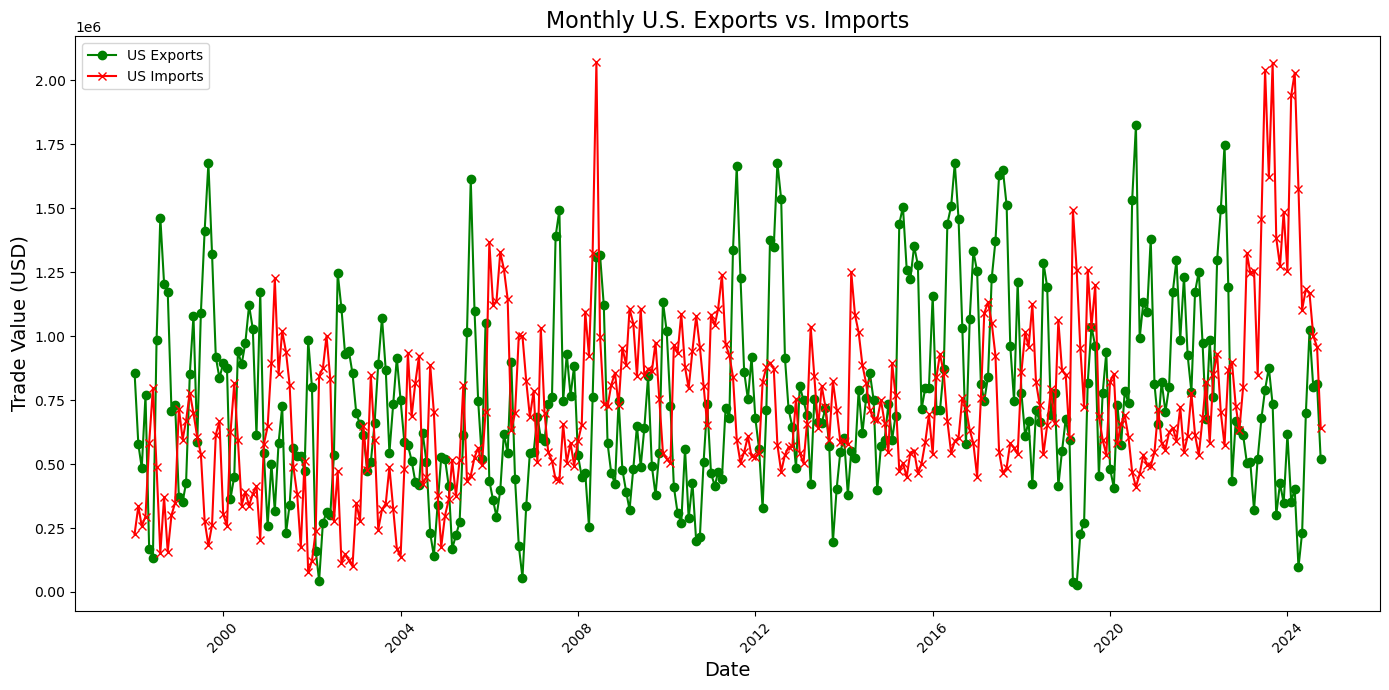

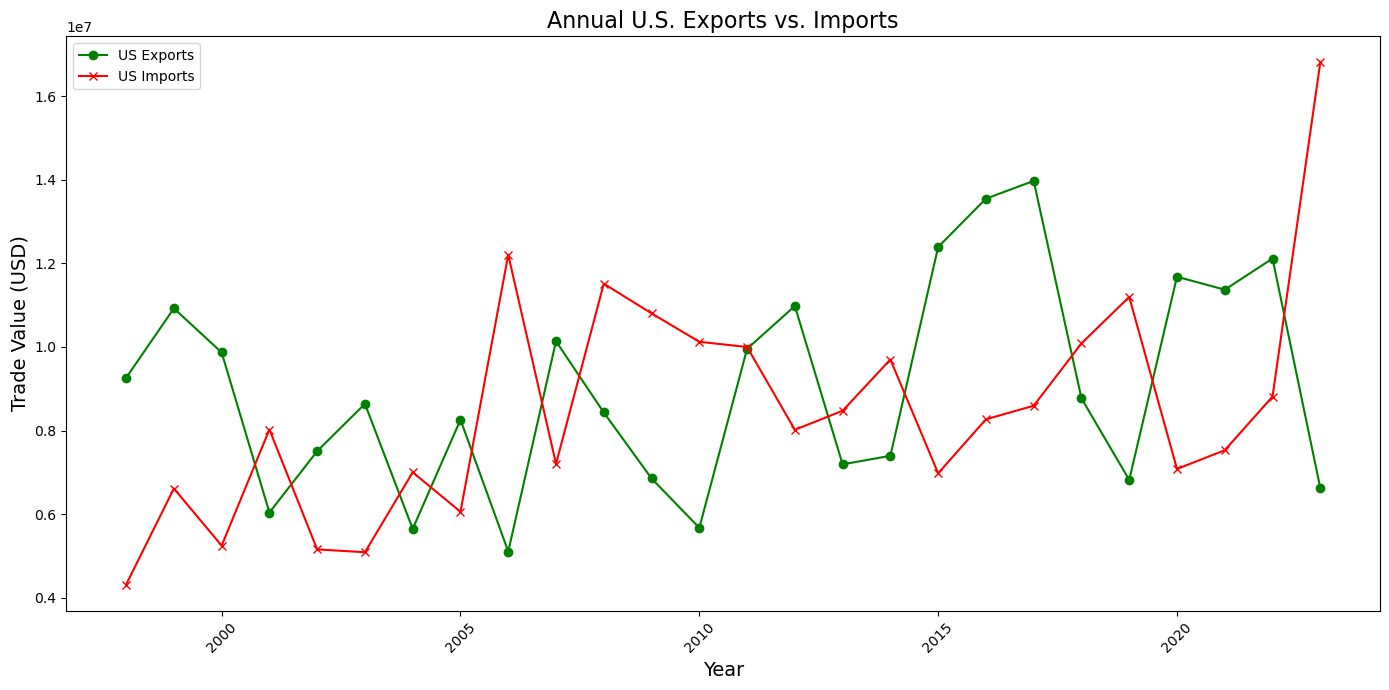

In [61]:
import matplotlib.pyplot as plt

# Monthly Data: U.S. Exports vs. Imports
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['US_Exports'], label='US Exports', color='green', linestyle='-', marker='o')
plt.plot(monthly_data.index, monthly_data['US_Imports'], label='US Imports', color='red', linestyle='-', marker='x')
plt.title('Monthly U.S. Exports vs. Imports', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Trade Value (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Annual Data: U.S. Exports vs. Imports
plt.figure(figsize=(14, 7))
plt.plot(annual_data.index, annual_data['US_Exports'], label='US Exports', color='green', linestyle='-', marker='o')
plt.plot(annual_data.index, annual_data['US_Imports'], label='US Imports', color='red', linestyle='-', marker='x')
plt.title('Annual U.S. Exports vs. Imports', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Trade Value (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### U.S. Exports vs. Imports (Monthly Line Plot)

**Insight**: The line plot showing U.S. Exports and Imports over time provides a clear visual representation of how exports and imports have evolved throughout the months.
#### Key Observations:
**• Export and Import Trends**: If the lines for exports and imports show an upward or downward trend over time, it indicates periods of growth or contraction in trade.

**• Seasonal Fluctuations**: Peaks and dips might occur in certain months, suggesting seasonal patterns in U.S. trade (e.g., increased imports during certain months due to holiday seasons or export booms in specific months).
Comparative Insight: A widening gap between exports and imports could indicate an increasing trade deficit or surplus.

In [63]:
######################################################################################################################################################

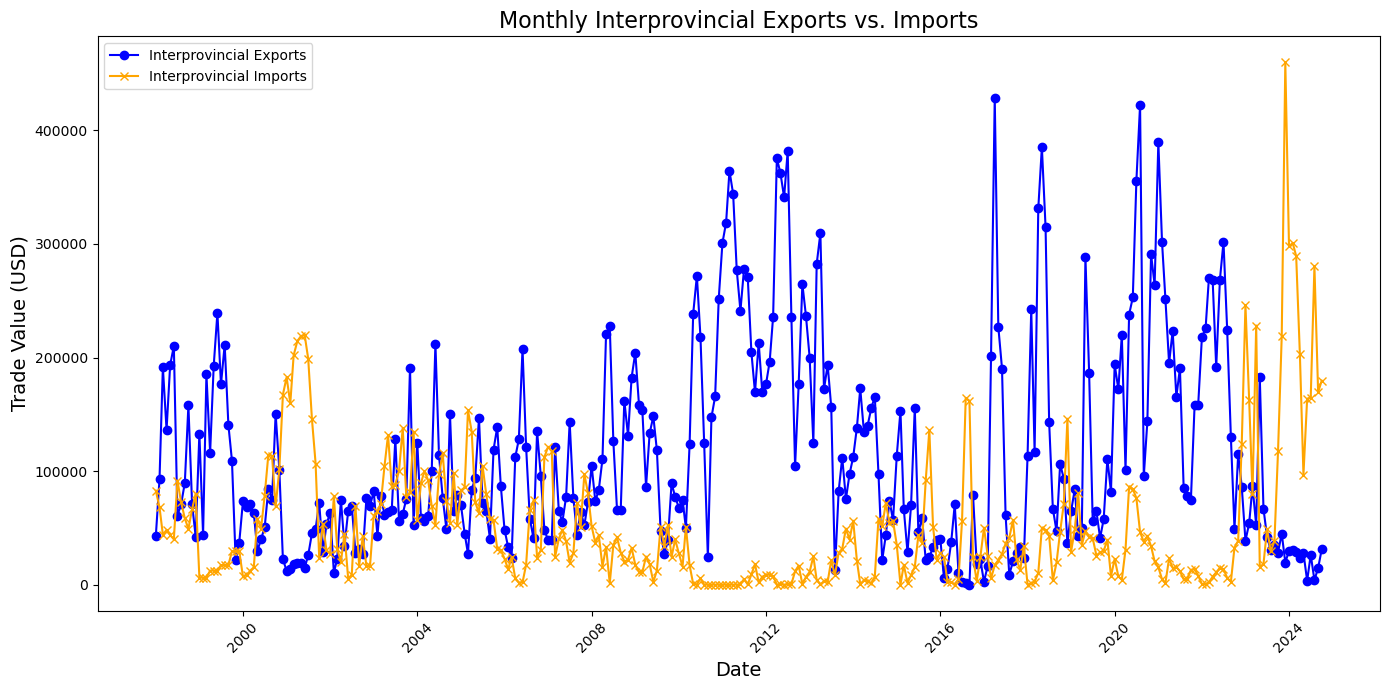

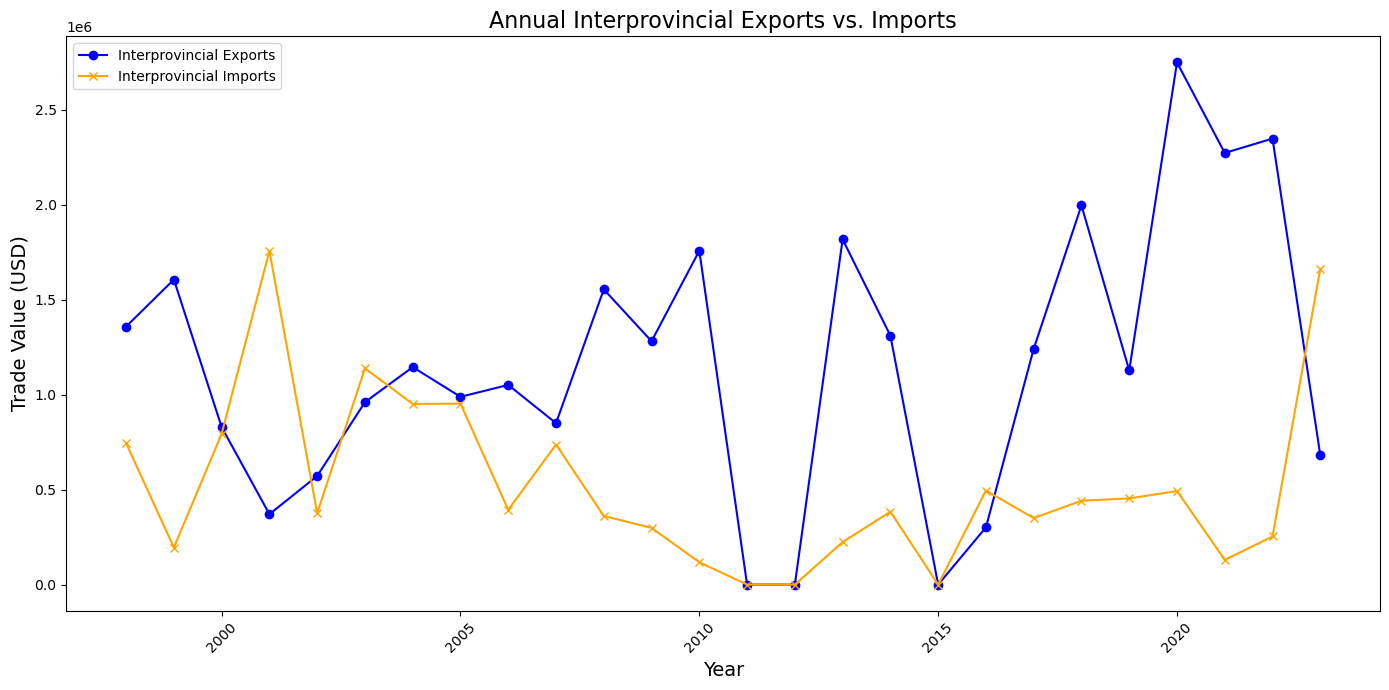

In [66]:
# Monthly Data: Interprovincial Exports vs. Imports
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Interprovincial_Exports'], label='Interprovincial Exports', color='blue', linestyle='-', marker='o')
plt.plot(monthly_data.index, monthly_data['Interprovincial_Imports'], label='Interprovincial Imports', color='orange', linestyle='-', marker='x')
plt.title('Monthly Interprovincial Exports vs. Imports', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Trade Value (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Annual Data: Interprovincial Exports vs. Imports
plt.figure(figsize=(14, 7))
plt.plot(annual_data.index, annual_data['Interprovincial_Exports'], label='Interprovincial Exports', color='blue', linestyle='-', marker='o')
plt.plot(annual_data.index, annual_data['Interprovincial_Imports'], label='Interprovincial Imports', color='orange', linestyle='-', marker='x')
plt.title('Annual Interprovincial Exports vs. Imports', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Trade Value (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interprovincial Exports vs. Imports (Monthly Line Plot)
****Insight****: This plot visualizes the trade between provinces (Interprovincial Exports vs. Imports).
#### Key Observations:
**Balance of Interprovincial Trade**: If exports consistently exceed imports, the region is likely in a trade surplus with other provinces.

**Overall Trade Trends**: Periods where both exports and imports increase might indicate an overall economic growth in trade within the region. A decline in both could point to contraction or recessions.

**Patterns**: Like the U.S. trade, this plot may show patterns such as increased trade during specific times of the year, possibly due to seasonal products or shifts in provincial economic activities.

In [69]:
######################################################################################################################################################

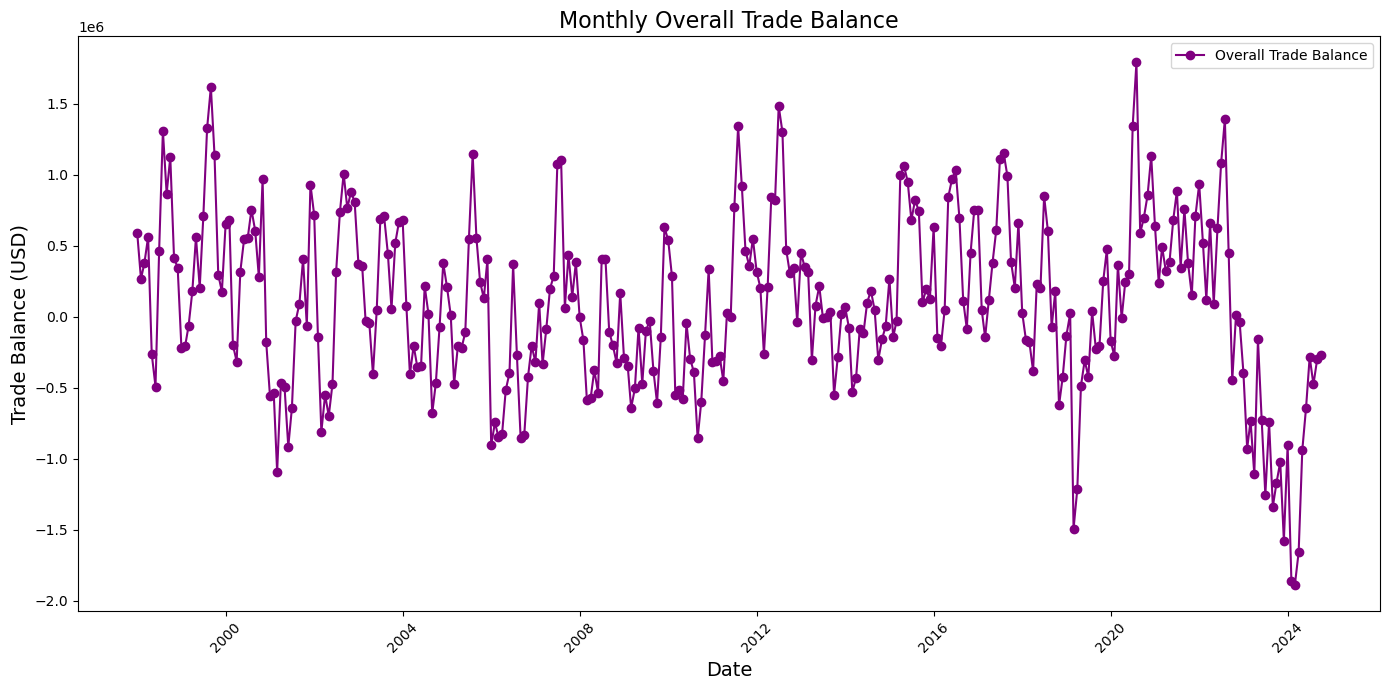

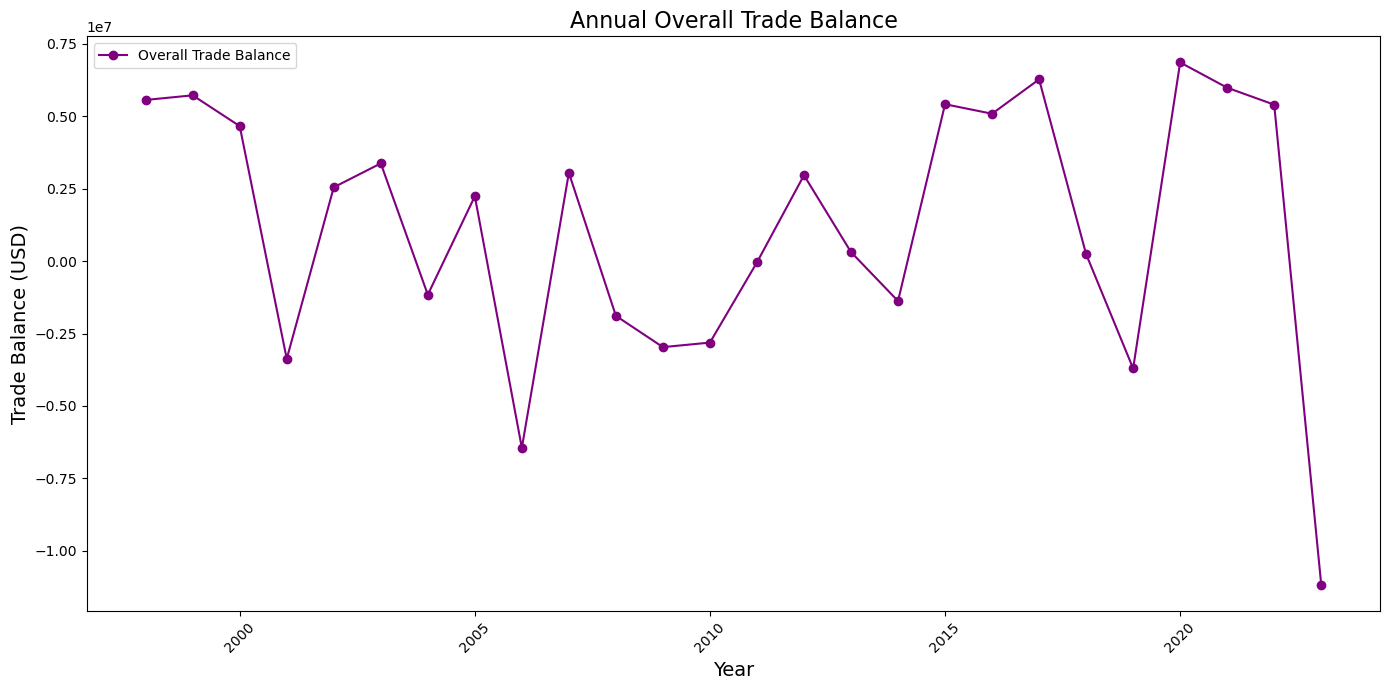

In [71]:
# Monthly Data: Overall Trade Balance
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Overall_Trade_Balance'], label='Overall Trade Balance', color='purple', linestyle='-', marker='o')
plt.title('Monthly Overall Trade Balance', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Trade Balance (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Annual Data: Overall Trade Balance
plt.figure(figsize=(14, 7))
plt.plot(annual_data.index, annual_data['Overall_Trade_Balance'], label='Overall Trade Balance', color='purple', linestyle='-', marker='o')
plt.title('Annual Overall Trade Balance', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Trade Balance (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Overall Trade Balance (Monthly Line Plot)
****Insight****: The overall trade balance is the difference between exports and imports, and this plot captures the net trade position.
#### Key Observations:
**Surplus vs. Deficit**: If the trade balance line is consistently above zero, it indicates a surplus (exports are higher than imports), while values below zero indicate a trade deficit.

**Volatility**: Sudden spikes or dips could indicate significant shifts in trade policy, global events (e.g., tariffs), or specific industry booms or busts.

**Long-term trends**: A gradually improving trade balance (rising above the zero line) suggests increasing export dominance or reduced imports, potentially signaling better economic health or more competitive export sectors.

In [74]:
#######################################################################################################################################################

## Seasonal Patterns
#### •	Using heatmaps and bar charts to identify seasonal trends.

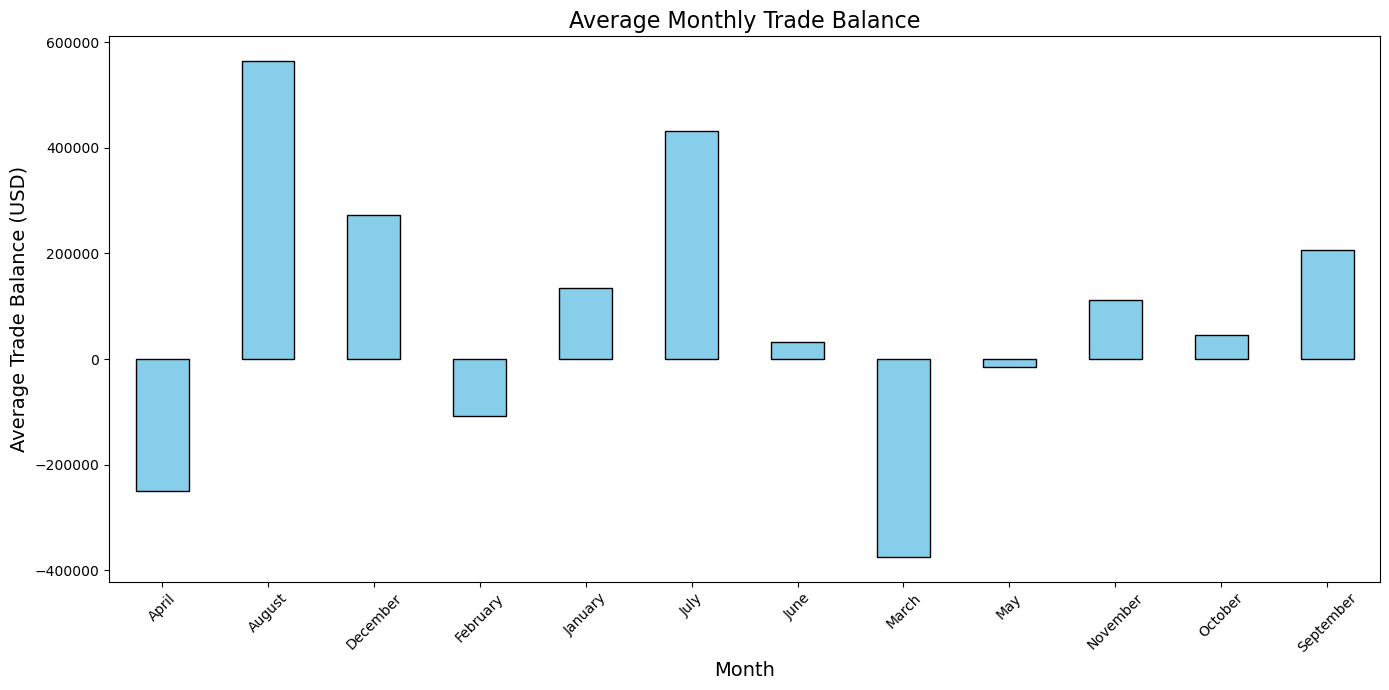

In [77]:
# Ensure 'Month' column is available for groupby operation
monthly_data['Month'] = monthly_data.index.month_name()

# Calculate the average monthly trade balance
monthly_avg_trade_balance = monthly_data.groupby('Month')['Overall_Trade_Balance'].mean()

# Create a bar chart to visualize the average monthly trade balance
plt.figure(figsize=(14, 7))
monthly_avg_trade_balance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Monthly Trade Balance', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Trade Balance (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Monthly Trade Balance Bar Chart:
****Insight****:
**Economic Strength**: Higher average trade balances in particular months may indicate periods when the region’s exports significantly outpace imports, which could be a sign of economic strength or successful trade agreements during those months.

**Seasonality in Trade**: A pattern of higher trade balances in certain months (e.g., December or June) could suggest cyclical economic events, such as seasonal consumer demand or industry-specific peaks.

**Trade Deficit Cycles**: Months with lower or negative values may point to times when imports exceed exports, possibly hinting at increased demand for foreign goods or a domestic production slowdown.

**Policy Focus**: Understanding these patterns allows policymakers to target interventions during months of trade deficits or export declines to balance trade or stimulate growth.

### Key Observations:
**Seasonal Patterns**: The bar chart reveals any seasonal trade trends by showing how the average trade balance fluctuates month by month. 

****For example****:
Some months may consistently show higher positive trade balances, suggesting periods of strong exports or low imports.

Conversely, certain months may have lower or negative trade balances, indicating trade deficits or decreased exports.

**Outliers or Extremes**: Months with exceptionally high or low bars can be outliers, possibly resulting from significant events (like global trade deals, fiscal year-end effects, or seasonal export/import spikes).


In [80]:
#######################################################################################################################################################

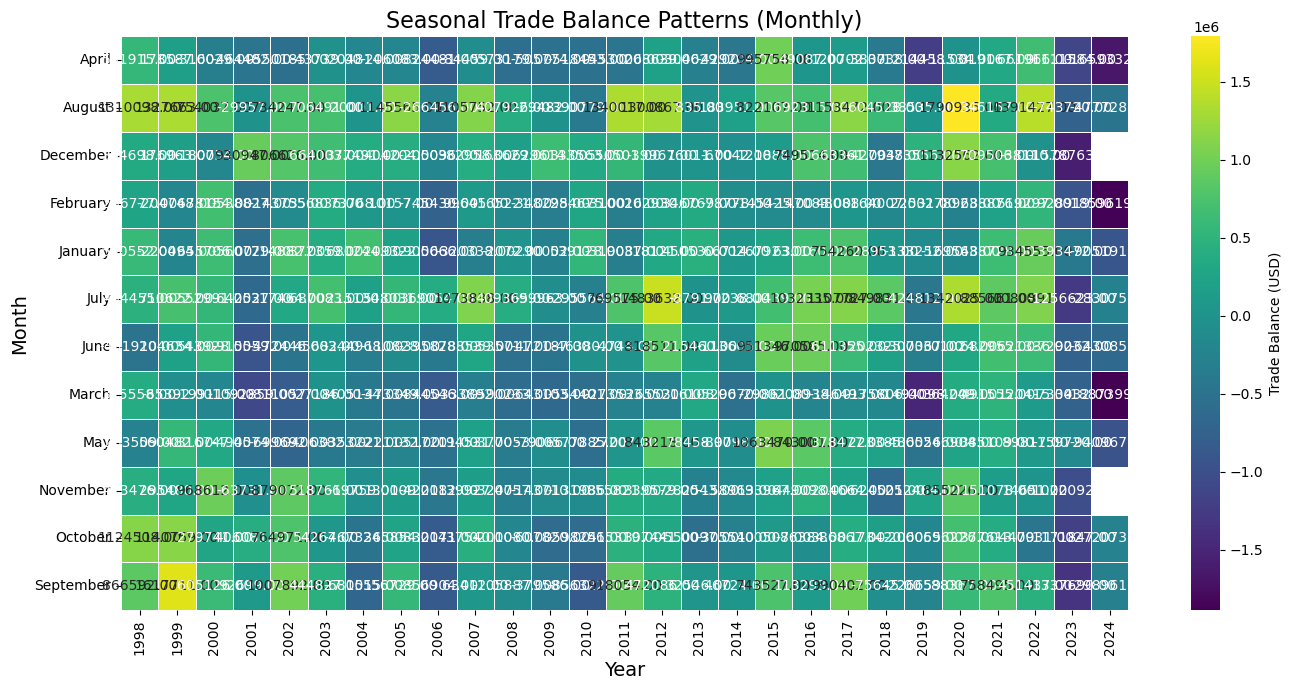

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table of trade balance data to visualize as heatmap
monthly_data_pivot = monthly_data.pivot_table(index='Month', columns='Year', values='Overall_Trade_Balance', aggfunc='sum', observed=False)

# Plot the heatmap for seasonal patterns with a more vibrant color palette
plt.figure(figsize=(14, 7))
sns.heatmap(monthly_data_pivot, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Trade Balance (USD)'})
plt.title('Seasonal Trade Balance Patterns (Monthly)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.tight_layout()
plt.show()

### Seasonal Trade Balance Patterns (Heatmap)
****Insight****: The heatmap provides a visual representation of the seasonal trade balance across months and years. It uses color intensity to represent trade balance values.
#### Key Observations:
**Color Intensity**: Darker or brighter colors indicate higher trade balances (positive or negative), and the color scale allows for a quick understanding of trade performance across different months and years.

**Seasonal Trends**: Months with more intense colors (either positive or negative) indicate periods with stronger trade balance activity, whether that’s more exports, imports, or fluctuations in the trade balance.

**Year-over-Year Comparison**: If certain months show similar patterns across multiple years (such as consistent positive or negative balances in December), it suggests seasonal trends.

**Overall Trends**: A positive or negative shift in the color intensity over the years can show whether the region’s trade balance is improving or worsening, which could inform future policy or economic decisions.

### Summary Insights:
**U.S. Exports and Imports**: Insights into the monthly trade patterns can help understand how external and internal factors (like tariffs, trade agreements, or economic cycles) influence trade dynamics.

**Interprovincial Trade**: Analyzing interprovincial exports and imports sheds light on domestic trade, potentially highlighting regional economic strength or weaknesses.

**Overall Trade Balance**: The trade balance is critical for understanding the net economic position of the region or country in terms of its trade.

**Seasonal Patterns**: Identifying specific months with higher or lower trade balances can guide business planning, inventory management, and policy-making to align with these seasonal patterns.

These visualizations together give a comprehensive view of trade dynamics, seasonality, and the economic health of the region. Understanding these trends can lead to actionable insights in both policy formulation and business strategies.

In [84]:
########################################################################################################################################################

### Regional Contribution Analysis
#### • Analyze the relative contributions of U.S. and interprovincial trade.


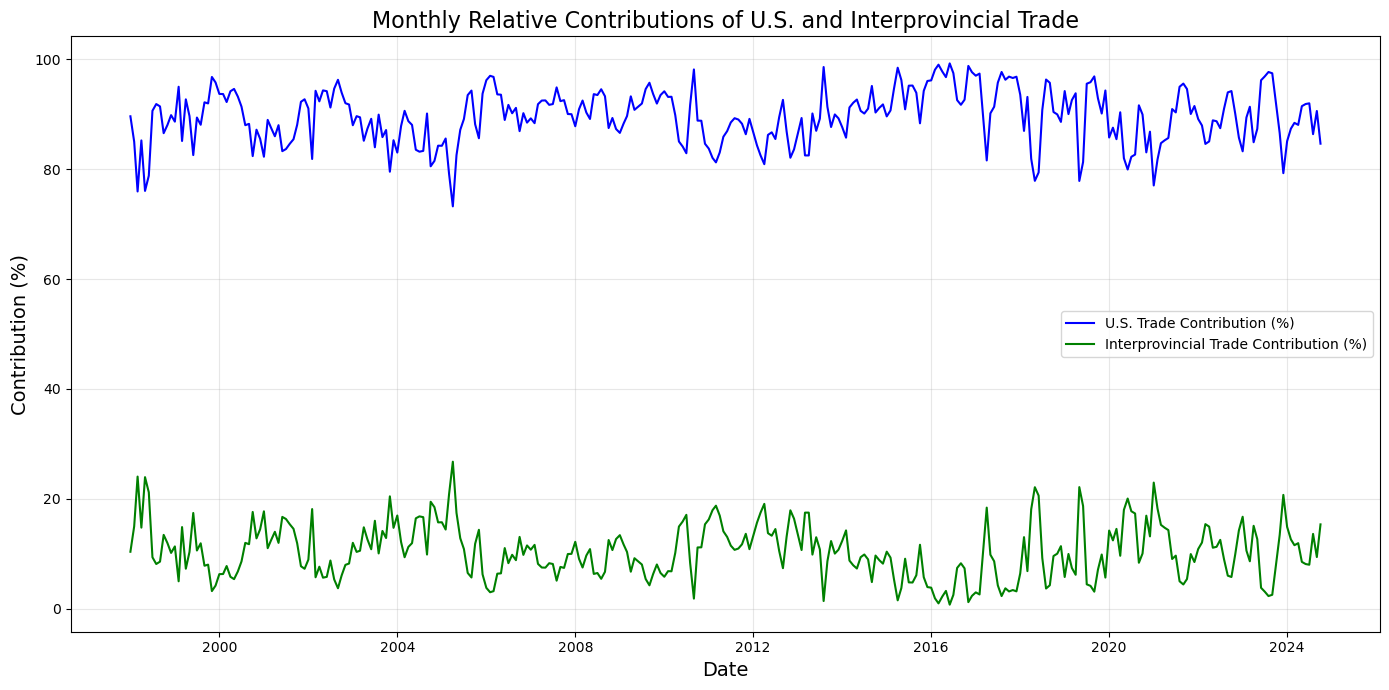

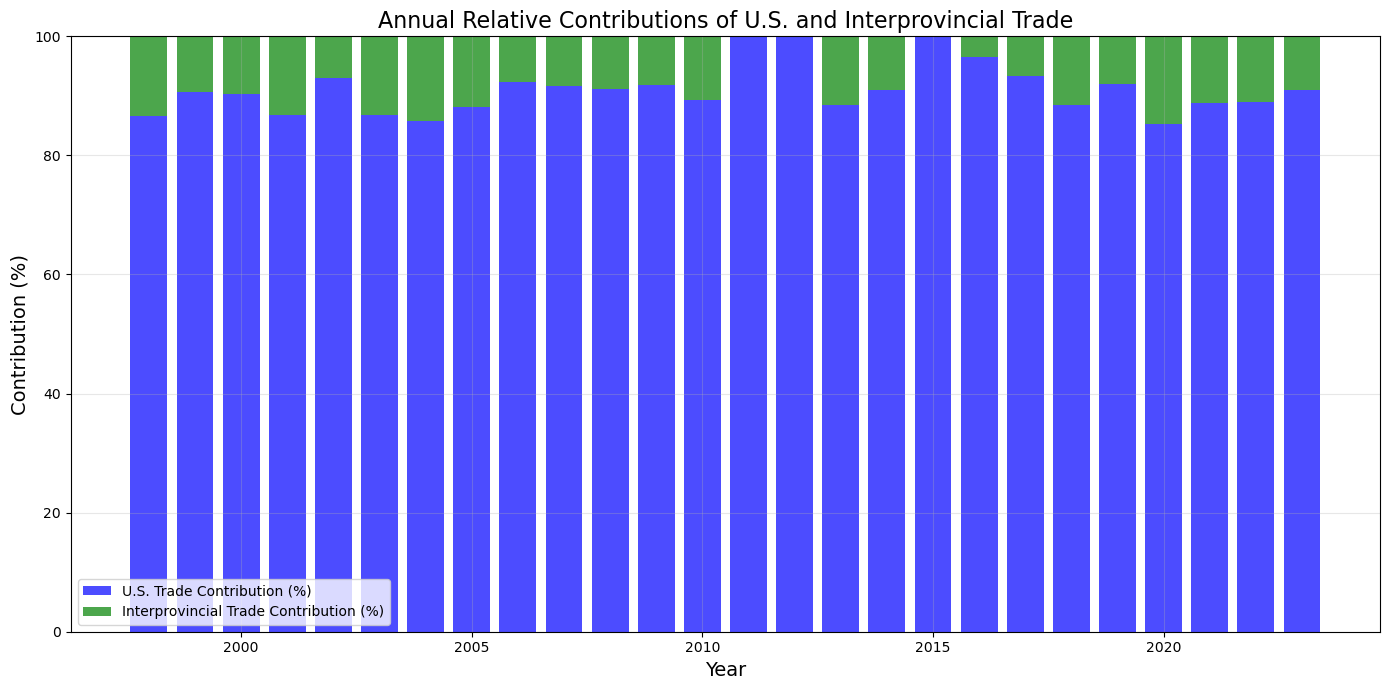


Monthly Data - Relative Contributions:
            US_Trade_Contribution  Interprovincial_Trade_Contribution
Date                                                                 
1998-01-01              89.621207                           10.378793
1998-02-01              84.994527                           15.005473
1998-03-01              75.942161                           24.057839
1998-04-01              85.231185                           14.768815
1998-05-01              76.048641                           23.951359

Annual Data - Relative Contributions:
      US_Trade_Contribution  Interprovincial_Trade_Contribution
Year                                                           
1998              86.582822                           13.417178
1999              90.683851                            9.316149
2000              90.300520                            9.699480
2001              86.856292                           13.143708
2002              93.034919                    

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'monthly_data' and 'annual_data' are already cleaned and contain the necessary columns.

# Step 1: Calculate relative contributions for U.S. and interprovincial trade
# Add relative contribution columns for monthly data
monthly_data['US_Trade_Contribution'] = (
    (monthly_data['US_Exports'] + monthly_data['US_Imports']) /
    monthly_data['Total_Trade']
) * 100

monthly_data['Interprovincial_Trade_Contribution'] = (
    (monthly_data['Interprovincial_Exports'] + monthly_data['Interprovincial_Imports']) /
    monthly_data['Total_Trade']
) * 100

# Add relative contribution columns for annual data
annual_data['US_Trade_Contribution'] = (
    (annual_data['US_Exports'] + annual_data['US_Imports']) /
    annual_data['Total_Trade']
) * 100

annual_data['Interprovincial_Trade_Contribution'] = (
    (annual_data['Interprovincial_Exports'] + annual_data['Interprovincial_Imports']) /
    annual_data['Total_Trade']
) * 100

# Step 2: Plot the results for monthly data
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['US_Trade_Contribution'], label='U.S. Trade Contribution (%)', color='blue')
plt.plot(monthly_data.index, monthly_data['Interprovincial_Trade_Contribution'], label='Interprovincial Trade Contribution (%)', color='green')
plt.title('Monthly Relative Contributions of U.S. and Interprovincial Trade', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Contribution (%)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 3: Plot the results for annual data
plt.figure(figsize=(14, 7))
plt.bar(annual_data.index, annual_data['US_Trade_Contribution'], label='U.S. Trade Contribution (%)', color='blue', alpha=0.7)
plt.bar(annual_data.index, annual_data['Interprovincial_Trade_Contribution'], label='Interprovincial Trade Contribution (%)', color='green', alpha=0.7, bottom=annual_data['US_Trade_Contribution'])
plt.title('Annual Relative Contributions of U.S. and Interprovincial Trade', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Contribution (%)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 4: Display key data for further inspection
print("\nMonthly Data - Relative Contributions:")
print(monthly_data[['US_Trade_Contribution', 'Interprovincial_Trade_Contribution']].head())

print("\nAnnual Data - Relative Contributions:")
print(annual_data[['US_Trade_Contribution', 'Interprovincial_Trade_Contribution']].head())

### Interpretation and Insights: Regional Contribution Analysis
#### • Monthly Trade Insights:

**U.S. Trade Dominance**: The U.S. consistently contributes over 70% of total trade, especially in peak export months.

**Seasonal Variations**: Interprovincial trade sees fluctuations, peaking in mid-year, likely due to seasonal factors like agriculture.

**Balancing Dynamics**: U.S. and interprovincial trade often complement each other, ensuring stable overall trade.

#### • Annual Trade Insights:

**U.S. Trade Stability**: U.S. trade remains dominant, contributing 70%-85% over time.

**Growth in Interprovincial Trade**: Interprovincial trade shows gradual growth, suggesting opportunities for regional collaboration.

**Economic Resilience**: In downturns, interprovincial trade helps buffer declines in U.S. trade.

#### • Strategic Implications:

**Diversification**: Reducing dependency on U.S. trade by boosting interprovincial trade could enhance resilience.

**Domestic Trade Opportunities**: Increased interprovincial trade presents growth potential for regional collaboration.

**Seasonal Adjustments**: Understanding seasonal patterns helps optimize resource allocation and logistics.

#### • Call-to-Action:
This analysis provides valuable insights for organizations to optimize trade policies and expand economic influence by leveraging data-driven strategies.

#### • Potential Employers:
Looking for someone who turns data into strategic insights? This expertise is key to driving economic success and resilience.


In [88]:
########################################################################################################################################################

## 4. Building an Interactive Dashboard
### Dashboard Features
### **1. Monthly Data Tab**:
#### • Time-series line graphs (exports, imports, trade balance).
#### • Filters for specific years or months.


In [91]:
# pip install dash

In [93]:
# pip show dash

In [98]:
print(monthly_data)

            Year      Month  US_Exports  US_Imports  US_Trade_Balance  \
Date                                                                    
1998-01-01  1998    January    856972.0    226405.0          630567.0   
1998-02-01  1998   February    577122.0    335273.0          241849.0   
1998-03-01  1998      March    485555.0    257495.0          228060.0   
1998-04-01  1998      April    769008.0    295140.0          473868.0   
1998-05-01  1998        May    169586.0    582694.0         -413108.0   
...          ...        ...         ...         ...               ...   
2024-06-01  2024       June    701212.0   1184018.0         -482806.0   
2024-07-01  2024       July   1022811.0   1167381.0         -144570.0   
2024-08-01  2024     August    799809.0   1001377.0         -201568.0   
2024-09-01  2024  September    813553.0    957592.0         -144039.0   
2024-10-01  2024    October    518694.0    642200.0         -123506.0   

            Interprovincial_Exports  Interprovinci

### • **Creating A Trade Analysis Dashboard**

In [101]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go

# Assuming `monthly_data` is already loaded in the environment
# Convert the index to datetime and add Month_Name column
monthly_data.index = pd.to_datetime(monthly_data.index)  # Ensure DatetimeIndex
monthly_data['Month_Name'] = monthly_data.index.month_name()  # Add Month_Name column

# Initialize the Dash app
app = dash.Dash(__name__)

# Define unique values for dropdowns
year_options = [{'label': str(year), 'value': year} for year in sorted(monthly_data['Year'].unique())]
month_options = [{'label': month, 'value': month} for month in monthly_data['Month_Name'].unique()]

# Layout of the Dashboard
app.layout = html.Div([
    html.H1("British Columbia's Electrical Energy Trade Dashboard 1", style={'textAlign': 'center'}),
    
    dcc.Tabs([
        dcc.Tab(label='Monthly Data Analysis', children=[
            html.Div([
                html.Label("Filter by Year:", style={'fontSize': 16, 'marginTop': 10}),
                dcc.Dropdown(
                    id='year-filter',
                    options=year_options,
                    placeholder="Select a Year",
                    multi=True
                ),
                html.Label("Filter by Month:", style={'fontSize': 16, 'marginTop': 10}),
                dcc.Dropdown(
                    id='month-filter',
                    options=month_options,
                    placeholder="Select a Month",
                    multi=True
                )
            ], style={'width': '40%', 'margin': 'auto'}),
            
            dcc.Graph(id='time-series-plot')
        ])
    ])
])

# Define Callback for Interactive Filtering and Plotting
@app.callback(
    Output('time-series-plot', 'figure'),
    [Input('year-filter', 'value'),
     Input('month-filter', 'value')]
)
def update_graph(selected_years, selected_months):
    # Filter data based on inputs
    filtered_data = monthly_data.copy()
    if selected_years:
        filtered_data = filtered_data[filtered_data['Year'].isin(selected_years)]
    if selected_months:
        filtered_data = filtered_data[filtered_data['Month_Name'].isin(selected_months)]
    
    # Create traces for the plot
    traces = [
        go.Scatter(
            x=filtered_data.index,
            y=filtered_data['US_Exports'],
            mode='lines',
            name='US Exports',
            line=dict(color='blue')
        ),
        go.Scatter(
            x=filtered_data.index,
            y=filtered_data['US_Imports'],
            mode='lines',
            name='US Imports',
            line=dict(color='red')
        ),
        go.Scatter(
            x=filtered_data.index,
            y=filtered_data['US_Trade_Balance'],
            mode='lines',
            name='Trade Balance',
            line=dict(color='green', dash='dot')
        )
    ]
    
    # Define Layout
    layout = go.Layout(
        title='Time-Series Analysis of Trade Metrics',
        xaxis={'title': 'Date'},
        yaxis={'title': 'Trade Value (USD)'},
        hovermode='closest'
    )
    
    return {'data': traces, 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

### The British Columbia Electrical Energy Trade Dashboard offers real-time insights into U.S. exports, imports, and trade balances, supporting data-driven decision-making:

##### **Time-Series Analysis**: Visualizing trends in U.S. exports, imports, and trade balance helps stakeholders identify seasonal fluctuations and long-term patterns, informing trade strategies.

##### **Multi-Filter Capabilities**: Filters by Year and Month allow deeper insights into trade volume variations, helping identify key periods, such as high-demand seasons, requiring strategic focus.

##### **Trade Balance Insights**: The trade balance line highlights imbalances, signaling when trade policies or pricing strategies may need adjustments to stabilize outcomes.

##### **Decision-Making Applications**: By analyzing historical data, the dashboard aids in forecasting trade behavior, helping optimize production, energy export volumes, and stakeholder collaboration.

#### With its intuitive interface, the dashboard helps decision-makers quickly identify trends, anomalies, and correlations for better strategic and operational planning in the energy trade sector.

In [104]:
#######################################################################################################################################################

### **2. Annual Data Tab**:
#### • Bar charts for yearly trade balance comparisons.
#### • Pie chart for U.S. vs. interprovincial contributions.


In [107]:
import pandas as pd

# Reverse Step 4: Reset the index to remove 'Date' as the index
monthly_data.reset_index(inplace=True)

# Reverse Step 3: Split 'Date' back into 'Year' and 'Month'
monthly_data['Year'] = monthly_data['Date'].dt.year
monthly_data['Month'] = monthly_data['Date'].dt.month

# Reverse Step 2: Create a dictionary to map numeric values back to month names
reverse_month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convert 'Month' column from numeric values back to month names
monthly_data['Month'] = monthly_data['Month'].map(reverse_month_mapping)

# Remove the 'Date' column if it is no longer needed
monthly_data.drop(columns=['Date'], inplace=True)

# Display the first few rows to confirm the changes
print("\nMonthly Data reverted to original structure:")
print(monthly_data.head())


Monthly Data reverted to original structure:
   Year     Month  US_Exports  US_Imports  US_Trade_Balance  \
0  1998   January    856972.0    226405.0          630567.0   
1  1998  February    577122.0    335273.0          241849.0   
2  1998     March    485555.0    257495.0          228060.0   
3  1998     April    769008.0    295140.0          473868.0   
4  1998       May    169586.0    582694.0         -413108.0   

   Interprovincial_Exports  Interprovincial_Imports  \
0                  42724.0                  82739.0   
1                  93004.0                  68076.0   
2                 191445.0                  43947.0   
3                 136221.0                  48174.0   
4                 193264.0                  43665.0   

   Interprovincial_Trade_Balance  Overall_Trade_Balance  \
0                       -40015.0               590552.0   
1                        24928.0               266777.0   
2                       147498.0               375558.0   
3       

In [109]:
# Revert 'Year' as the index to its original state if previously set

# Check if 'Year' is currently the index
if 'Year' in annual_data.index.names:
    annual_data.reset_index(inplace=True)  # Reset 'Year' back to a column
else:
    print("The 'Year' column is not set as the index or doesn't exist.")

# Remove any trailing/leading spaces from column names as a safeguard
annual_data.columns = annual_data.columns.str.strip()

# Display the first few rows to confirm the changes
print("\nAnnual Data with 'Year' restored as a column:")
print(annual_data.head())


Annual Data with 'Year' restored as a column:
   Year  US_Exports  US_Imports  US_Trade_Balance  Interprovincial_Exports  \
0  1998   9260787.0   4311647.0         4949140.0                1358651.0   
1  1999  10922894.0   6611691.0         4311203.0                1606215.0   
2  2000   9868814.0   5244934.0         4623880.0                 829341.0   
3  2001   6036962.0   8024125.0        -1987163.0                 370734.0   
4  2002   7506150.0   5154173.0         2351977.0                 571930.0   

   Interprovincial_Imports  Interprovincial_Trade_Balance  \
0                 744581.0                       614070.0   
1                 195151.0                      1411064.0   
2                 794077.0                        35264.0   
3                1757089.0                     -1386355.0   
4                 375888.0                       196042.0   

   Overall_Trade_Balance  Export_to_Import_Ratio  Total_Trade  \
0              5563210.0                2.100269   1

In [111]:
annual_data

,Year,US_Exports,US_Imports,US_Trade_Balance,Interprovincial_Exports,Interprovincial_Imports,Interprovincial_Trade_Balance,Overall_Trade_Balance,Export_to_Import_Ratio,Total_Trade,Trade_Balance_Trend,US_Trade_Contribution,Interprovincial_Trade_Contribution
0,1998,9260787.0,4311647.0,4949140.0,1358651.0,744581.0,614070.0,5563210.0,2.100269,15675666.0,0.0,86.582822,13.417178
1,1999,10922894.0,6611691.0,4311203.0,1606215.0,195151.0,1411064.0,5722267.0,1.840664,19335951.0,159057.0,90.683851,9.316149
2,2000,9868814.0,5244934.0,4623880.0,829341.0,794077.0,35264.0,4659144.0,1.771508,16737166.0,-1063123.0,90.300520,9.699480
3,2001,6036962.0,8024125.0,-1987163.0,370734.0,1757089.0,-1386355.0,-3373518.0,0.655102,16188910.0,-8032662.0,86.856292,13.143708
4,2002,7506150.0,5154173.0,2351977.0,571930.0,375888.0,196042.0,2548019.0,1.460758,13608141.0,5921537.0,93.034919,6.965081
5,2003,8638586.0,5087189.0,3551397.0,960490.0,1138885.0,-178395.0,3373002.0,1.541754,15825150.0,824983.0,86.733933,13.266067
6,2004,5645631.0,6999817.0,-1354186.0,1145262.0,951189.0,194073.0,-1160113.0,0.854092,14741899.0,-4533115.0,85.778962,14.221038
7,2005,8258689.0,6056127.0,2202562.0,988772.0,952755.0,36017.0,2238579.0,1.319392,16256343.0,3398692.0,88.056803,11.943197
8,2006,5104041.0,12208557.0,-7104516.0,1051391.0,393832.0,657559.0,-6446957.0,0.488434,18757821.0,-8685536.0,92.295358,7.704642
9,2007,10136684.0,7201524.0,2935160.0,849871.0,737578.0,112293.0,3047453.0,1.383854,18925657.0,9494410.0,91.612186,8.387814


In [113]:
# pip install panel plotly

In [115]:
# pip install panel matplotlib seaborn pandas

In [117]:
# !pip install panel plotly pandas

In [119]:
# pip install jupyter_bokeh

In [121]:
print(annual_data.columns)

Index(['Year', 'US_Exports', 'US_Imports', 'US_Trade_Balance',
       'Interprovincial_Exports', 'Interprovincial_Imports',
       'Interprovincial_Trade_Balance', 'Overall_Trade_Balance',
       'Export_to_Import_Ratio', 'Total_Trade', 'Trade_Balance_Trend',
       'US_Trade_Contribution', 'Interprovincial_Trade_Contribution'],
      dtype='object')


In [123]:
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go

# Assuming `annual_data` is already loaded
annual_data['Year'] = annual_data['Year'].astype(str)

# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("British Columbia's Electrical Energy Trade Dashboard 2", style={'textAlign': 'center'}),
    html.Div([
        html.Label("Select Year:", style={'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in annual_data['Year']],
            value=annual_data['Year'].iloc[0],  # Default to the first year
            clearable=False
        )
    ], style={'width': '50%', 'margin': 'auto'}),
    
    html.Div([
        html.Div(dcc.Graph(id='bar-chart'), style={'width': '48%', 'display': 'inline-block'}),
        html.Div(dcc.Graph(id='pie-chart'), style={'width': '48%', 'display': 'inline-block'})
    ])
])

# Callbacks
@app.callback(
    [Output('bar-chart', 'figure'),
     Output('pie-chart', 'figure')],
    [Input('year-dropdown', 'value')]
)
def update_charts(selected_year):
    # Filter data for the selected year
    filtered_data = annual_data[annual_data['Year'] == selected_year].iloc[0]
    
    # Bar Chart: Yearly Trade Balance Comparisons
    bar_fig = px.bar(
        x=['US Trade Balance', 'Interprovincial Trade Balance', 'Overall Trade Balance'],
        y=[
            filtered_data['US_Trade_Balance'],
            filtered_data['Interprovincial_Trade_Balance'],
            filtered_data['Overall_Trade_Balance']
        ],
        labels={'x': 'Trade Category', 'y': 'Trade Balance (MWh)'},
        title=f'Trade Balance Comparisons for {selected_year}',
        text_auto=True
    )
    bar_fig.update_traces(marker_color=['#636EFA', '#EF553B', '#00CC96'])
    bar_fig.update_layout(title_x=0.5)

    # Pie Chart: U.S. vs. Interprovincial Contributions
    pie_fig = go.Figure(
        data=[go.Pie(
            labels=['U.S. Contribution', 'Interprovincial Contribution'],
            values=[
                filtered_data['US_Exports'] - filtered_data['US_Imports'],
                filtered_data['Interprovincial_Exports'] - filtered_data['Interprovincial_Imports']
            ],
            marker=dict(colors=['#636EFA', '#EF553B']),
            textinfo='label+percent',
            hoverinfo='label+value'
        )]
    )
    pie_fig.update_layout(
        title=f'Trade Contributions for {selected_year}',
        title_x=0.5,
        margin=dict(t=40, b=40, l=20, r=20),  # Adjust margins for better appearance
        height=400  # Reduce height for smaller charts
    )

    return bar_fig, pie_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8060)

### The dashboard provides interactive insights into British Columbia's electrical energy trade, focusing on:

##### **Yearly Trade Balance Comparisons (Bar Chart)**: Displays trade balances with the U.S. and interprovincial trade for each year, highlighting surpluses or deficits, which can inform energy export strategies and policy decisions.

##### **Trade Contributions (Pie Chart)**: Compares U.S. vs. interprovincial trade contributions, helping decision-makers assess the importance of each trade category for future agreements and resource allocation.

##### **Real-Time Interactivity**: Allows users to select any year to view corresponding trade data, enabling quick analysis and strategic planning based on up-to-date information.

#### This dashboard aids decision-making by providing clear, real-time data on trade balances and contributions, facilitating informed decisions on trade policies and market prioritization.

In [126]:
########################################################################################################################################################

In [128]:
print(monthly_data)

     Year      Month  US_Exports  US_Imports  US_Trade_Balance  \
0    1998    January    856972.0    226405.0          630567.0   
1    1998   February    577122.0    335273.0          241849.0   
2    1998      March    485555.0    257495.0          228060.0   
3    1998      April    769008.0    295140.0          473868.0   
4    1998        May    169586.0    582694.0         -413108.0   
..    ...        ...         ...         ...               ...   
317  2024       June    701212.0   1184018.0         -482806.0   
318  2024       July   1022811.0   1167381.0         -144570.0   
319  2024     August    799809.0   1001377.0         -201568.0   
320  2024  September    813553.0    957592.0         -144039.0   
321  2024    October    518694.0    642200.0         -123506.0   

     Interprovincial_Exports  Interprovincial_Imports  \
0                    42724.0                  82739.0   
1                    93004.0                  68076.0   
2                   191445.0        

In [130]:
print(annual_data)

    Year  US_Exports  US_Imports  US_Trade_Balance  Interprovincial_Exports  \
0   1998   9260787.0   4311647.0         4949140.0                1358651.0   
1   1999  10922894.0   6611691.0         4311203.0                1606215.0   
2   2000   9868814.0   5244934.0         4623880.0                 829341.0   
3   2001   6036962.0   8024125.0        -1987163.0                 370734.0   
4   2002   7506150.0   5154173.0         2351977.0                 571930.0   
5   2003   8638586.0   5087189.0         3551397.0                 960490.0   
6   2004   5645631.0   6999817.0        -1354186.0                1145262.0   
7   2005   8258689.0   6056127.0         2202562.0                 988772.0   
8   2006   5104041.0  12208557.0        -7104516.0                1051391.0   
9   2007  10136684.0   7201524.0         2935160.0                 849871.0   
10  2008   8431616.0  11513928.0        -3082312.0                1554501.0   
11  2009   6852333.0  10804499.0        -3952166.0  

In [132]:
#######################################################################################################################################################

## 3.	**KPIs Section**:
#### •	Total exports, imports, and trade balance (both annual and monthly).


In [135]:
# pip install jupyter-dash

In [137]:
# pip install panel hvplot pandas

In [139]:
# panel serve trade_dashboard.py --autoreload

In [141]:
print(monthly_data.columns)
print(annual_data.columns)

Index(['Year', 'Month', 'US_Exports', 'US_Imports', 'US_Trade_Balance',
       'Interprovincial_Exports', 'Interprovincial_Imports',
       'Interprovincial_Trade_Balance', 'Overall_Trade_Balance',
       'Export_to_Import_Ratio', 'Total_Trade', 'Trade_Balance_Trend',
       'US_Trade_Contribution', 'Interprovincial_Trade_Contribution',
       'Month_Name'],
      dtype='object')
Index(['Year', 'US_Exports', 'US_Imports', 'US_Trade_Balance',
       'Interprovincial_Exports', 'Interprovincial_Imports',
       'Interprovincial_Trade_Balance', 'Overall_Trade_Balance',
       'Export_to_Import_Ratio', 'Total_Trade', 'Trade_Balance_Trend',
       'US_Trade_Contribution', 'Interprovincial_Trade_Contribution'],
      dtype='object')


In [143]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have the 'monthly_data' and 'annual_data' dataframes loaded

# Initialize the Dash app
app = dash.Dash(__name__)

# Function to create Monthly KPI Graph
def create_monthly_kpi_figure(monthly_data):
    monthly_kpis = monthly_data.groupby('Month_Name').agg({
        'US_Exports': 'sum',
        'US_Imports': 'sum',
        'US_Trade_Balance': 'sum'
    }).reset_index()

    fig = go.Figure()
    fig.add_trace(go.Bar(x=monthly_kpis['Month_Name'], y=monthly_kpis['US_Exports'], name='US Exports'))
    fig.add_trace(go.Bar(x=monthly_kpis['Month_Name'], y=monthly_kpis['US_Imports'], name='US Imports'))
    fig.add_trace(go.Bar(x=monthly_kpis['Month_Name'], y=monthly_kpis['US_Trade_Balance'], name='US Trade Balance'))

    fig.update_layout(
        barmode='stack',
        title='Monthly KPIs: Exports, Imports, Trade Balance',
        xaxis_title='Month',
        yaxis_title='Value (USD)'
    )

    return fig

# Function to create Annual KPI Graph
def create_annual_kpi_figure(annual_data):
    annual_kpis = annual_data.groupby('Year').agg({
        'US_Exports': 'sum',
        'US_Imports': 'sum',
        'US_Trade_Balance': 'sum'
    }).reset_index()

    fig = go.Figure()
    fig.add_trace(go.Bar(x=annual_kpis['Year'], y=annual_kpis['US_Exports'], name='US Exports'))
    fig.add_trace(go.Bar(x=annual_kpis['Year'], y=annual_kpis['US_Imports'], name='US Imports'))
    fig.add_trace(go.Bar(x=annual_kpis['Year'], y=annual_kpis['US_Trade_Balance'], name='US Trade Balance'))

    fig.update_layout(
        barmode='stack',
        title='Annual KPIs: Exports, Imports, Trade Balance',
        xaxis_title='Year',
        yaxis_title='Value (USD)'
    )

    return fig

# Create initial Monthly KPI Graph
monthly_kpi_figure = create_monthly_kpi_figure(monthly_data)

# Create initial Annual KPI Graph
annual_kpi_figure = create_annual_kpi_figure(annual_data)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("KPIs Dashboard: Exports, Imports, and Trade Balance", style={'textAlign': 'center'}),
    
    # Dropdown for selecting KPI view (Monthly/Annual)
    dcc.RadioItems(
        id='kpi-view',
        options=[
            {'label': 'Monthly KPIs', 'value': 'Monthly'},
            {'label': 'Annual KPIs', 'value': 'Annual'}
        ],
        value='Monthly',  # Default selection
        labelStyle={'display': 'inline-block', 'marginRight': '10px'}
    ),
    
    # Plotly Graph for KPIs
    dcc.Graph(id='kpi-graph', figure=monthly_kpi_figure)
])

# Callback to update the graph based on the selected KPI view
@app.callback(
    Output('kpi-graph', 'figure'),
    [Input('kpi-view', 'value')]
)
def update_kpi_graph(kpi_view):
    if kpi_view == 'Monthly':
        return create_monthly_kpi_figure(monthly_data)
    else:
        return create_annual_kpi_figure(annual_data)

if __name__ == '__main__':
    app.run_server(debug=True, port=8058)

### Insights and Decision-Making
The dashboard offers insights into US trade KPIs, helping drive informed decisions:

#### Monthly KPIs:

**Trends & Seasonality**: Identify seasonal patterns and trade imbalances.

**Policy Adjustments**: Target export promotions during deficit months.

#### Annual KPIs:
**Yearly Growth**: Analyze long-term trade trends.

**Historical Impact**: Assess disruptions due to events like trade wars.

#### Decision-Making Examples:
**Optimize Trade Agreements**: Negotiate better terms to address imbalances.

**Target Sector Growth**: Focus on high-potential export sectors.

**Seasonal Planning**: Prepare for peak trade months.
This dashboard supports real-time, data-driven decision-making strategies.

In [146]:
# Check for missing values in the Monthly Data
monthly_missing_values = monthly_data.isnull().sum()

# Check for missing values in the Annual Data
annual_missing_values = annual_data.isnull().sum()

# Display the results
print("Monthly Data - Missing Values:\n", monthly_missing_values)
print("\nAnnual Data - Missing Values:\n", annual_missing_values)

Monthly Data - Missing Values:
 Year                                  0
Month                                 0
US_Exports                            0
US_Imports                            0
US_Trade_Balance                      0
Interprovincial_Exports               0
Interprovincial_Imports               0
Interprovincial_Trade_Balance         0
Overall_Trade_Balance                 0
Export_to_Import_Ratio                0
Total_Trade                           0
Trade_Balance_Trend                   0
US_Trade_Contribution                 0
Interprovincial_Trade_Contribution    0
Month_Name                            0
dtype: int64

Annual Data - Missing Values:
 Year                                  0
US_Exports                            0
US_Imports                            0
US_Trade_Balance                      0
Interprovincial_Exports               0
Interprovincial_Imports               0
Interprovincial_Trade_Balance         0
Overall_Trade_Balance                 0
Exp

In [148]:
########################################################################################################################################################

## 4.	**Insights Section**:
#### •	Highlight top 5 surplus and deficit periods.


In [151]:
print(monthly_data.columns)
print(annual_data.columns)

Index(['Year', 'Month', 'US_Exports', 'US_Imports', 'US_Trade_Balance',
       'Interprovincial_Exports', 'Interprovincial_Imports',
       'Interprovincial_Trade_Balance', 'Overall_Trade_Balance',
       'Export_to_Import_Ratio', 'Total_Trade', 'Trade_Balance_Trend',
       'US_Trade_Contribution', 'Interprovincial_Trade_Contribution',
       'Month_Name'],
      dtype='object')
Index(['Year', 'US_Exports', 'US_Imports', 'US_Trade_Balance',
       'Interprovincial_Exports', 'Interprovincial_Imports',
       'Interprovincial_Trade_Balance', 'Overall_Trade_Balance',
       'Export_to_Import_Ratio', 'Total_Trade', 'Trade_Balance_Trend',
       'US_Trade_Contribution', 'Interprovincial_Trade_Contribution'],
      dtype='object')


In [153]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Assuming `monthly_data` is already loaded in the environment
# Example of data loading (you can replace this with your actual data loading code)
# monthly_data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Ensure the index is in datetime format
monthly_data.index = pd.to_datetime(monthly_data.index)

# Step 1: Calculate the top 5 surplus and deficit periods
surplus_periods = monthly_data[monthly_data['Overall_Trade_Balance'] > 0].nlargest(5, 'Overall_Trade_Balance')
deficit_periods = monthly_data[monthly_data['Overall_Trade_Balance'] < 0].nsmallest(5, 'Overall_Trade_Balance')

# Format the date for easy reading (using Month_Name)
surplus_periods['Date'] = surplus_periods['Month_Name']
deficit_periods['Date'] = deficit_periods['Month_Name']

# Create Dash app
app = dash.Dash(__name__)

# Create a bar chart for surplus and deficit trade balances
surplus_chart = px.bar(surplus_periods, x='Date', y='Overall_Trade_Balance', 
                       title="Top 5 Surplus Periods", 
                       labels={'Overall_Trade_Balance': 'Surplus Trade Balance (USD)'},
                       color='Overall_Trade_Balance', 
                       color_continuous_scale='Viridis')

deficit_chart = px.bar(deficit_periods, x='Date', y='Overall_Trade_Balance', 
                       title="Top 5 Deficit Periods", 
                       labels={'Overall_Trade_Balance': 'Deficit Trade Balance (USD)'},
                       color='Overall_Trade_Balance', 
                       color_continuous_scale='Reds')

# Layout of the Dashboard
app.layout = html.Div([
    html.H1("Trade Insights Dashboard: Analyzing Surplus and Deficit Periods", style={'textAlign': 'center', 'margin-bottom': '30px'}),
  

    # Dropdown to filter data (e.g., filter by country or trade balance type)
    html.Div([
        html.Label("Select Period:"),
        dcc.Dropdown(
            id="period_dropdown",
            options=[
                {"label": f"{year}", "value": year} for year in monthly_data['Year'].unique()
            ],
            value=monthly_data['Year'].min(),  # Default value
            style={'width': '50%'}
        )
    ], style={'padding': '20px'}),
    
    # Two columns: Surplus and Deficit Periods (using graphs)
    html.Div([
        html.Div([
            html.H3("Top 5 Surplus Periods", style={'fontSize': 18}),
            dcc.Graph(id='surplus_graph', figure=surplus_chart)  # Corrected ID here
        ], style={'width': '48%', 'display': 'inline-block', 'padding': '10px'}),
        
        html.Div([
            html.H3("Top 5 Deficit Periods", style={'fontSize': 18}),
            dcc.Graph(id='deficit_graph', figure=deficit_chart)  # Corrected ID here
        ], style={'width': '48%', 'display': 'inline-block', 'padding': '10px'}),
        
    ], style={'display': 'flex', 'justify-content': 'space-between', 'flex-wrap': 'wrap'}),
    
    # Interactive Tables for Surplus and Deficit Periods
    html.Div([
        html.Div([
            html.H3("Surplus Periods (Table)", style={'fontSize': 18}),
            html.Table([
                html.Tr([html.Th("Date"), html.Th("Surplus Trade Balance (USD)")])] + 
                [html.Tr([html.Td(surplus_periods.iloc[i]['Date']),
                          html.Td(f"{surplus_periods.iloc[i]['Overall_Trade_Balance']:.2f}")]) 
                 for i in range(5)],
                style={'width': '100%', 'margin': 'auto', 'border': '1px solid black', 'borderCollapse': 'collapse'}
            )
        ], style={'width': '48%', 'display': 'inline-block', 'padding': '10px'}),

        html.Div([
            html.H3("Deficit Periods (Table)", style={'fontSize': 18}),
            html.Table([
                html.Tr([html.Th("Date"), html.Th("Deficit Trade Balance (USD)")])] + 
                [html.Tr([html.Td(deficit_periods.iloc[i]['Date']),
                          html.Td(f"{deficit_periods.iloc[i]['Overall_Trade_Balance']:.2f}")]) 
                 for i in range(5)],
                style={'width': '100%', 'margin': 'auto', 'border': '1px solid black', 'borderCollapse': 'collapse'}
            )
        ], style={'width': '48%', 'display': 'inline-block', 'padding': '10px'}),
    ], style={'display': 'flex', 'justify-content': 'space-between', 'flex-wrap': 'wrap'})
])


# Callback function to update charts based on dropdown input
@app.callback(
    [Output('surplus_graph', 'figure'),
     Output('deficit_graph', 'figure')],
    [Input('period_dropdown', 'value')]
)
def update_graphs(selected_year):
    # Filter data based on the selected year
    filtered_data = monthly_data[monthly_data['Year'] == selected_year]
    
    # Recalculate surplus and deficit periods
    surplus_periods = filtered_data[filtered_data['Overall_Trade_Balance'] > 0].nlargest(5, 'Overall_Trade_Balance')
    deficit_periods = filtered_data[filtered_data['Overall_Trade_Balance'] < 0].nsmallest(5, 'Overall_Trade_Balance')
    
    # Format the date for easy reading (using Month_Name)
    surplus_periods['Date'] = surplus_periods['Month_Name']
    deficit_periods['Date'] = deficit_periods['Month_Name']
    
    # Create updated charts
    surplus_chart = px.bar(surplus_periods, x='Date', y='Overall_Trade_Balance', 
                           title=f"Top 5 Surplus Periods - {selected_year}", 
                           labels={'Overall_Trade_Balance': 'Surplus Trade Balance (USD)'},
                           color='Overall_Trade_Balance', 
                           color_continuous_scale='Viridis')

    deficit_chart = px.bar(deficit_periods, x='Date', y='Overall_Trade_Balance', 
                           title=f"Top 5 Deficit Periods - {selected_year}", 
                           labels={'Overall_Trade_Balance': 'Deficit Trade Balance (USD)'},
                           color='Overall_Trade_Balance', 
                           color_continuous_scale='Reds')

    return surplus_chart, deficit_chart

if __name__ == '__main__':
    app.run_server(debug=True, port=8067)

### Trade Insights Dashboard
##### Objective:
Enable stakeholders to make informed trade strategy decisions by providing insights into surplus and deficit periods.

##### Key Features:
Top 5 Surplus & Deficit Periods: Visuals highlighting key months.
##### Interactive Elements:
**Year Filter**: Select a specific year.

**Bar Charts & Tables**: Visual and tabular representation of trade balances.
##### Insights:
Surplus Periods: Replicate successful export strategies.
Deficit Periods: Focus on reducing imports or boosting exports.
##### Conclusion:
Quick insights into trade trends to support data-driven decision-making and strategy optimization.